In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
iris = sns.load_dataset("iris")         # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")         # 팁 데이터
flights = sns.load_dataset("flights")   # 여객운송 데이터
mpg = sns.load_dataset('mpg')           # mile per gallon 데이터

- 1차원 분포

# 비일반적 방법
x = iris.petal_length.values
sns.displot(x, rug=True, kde=True)  
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

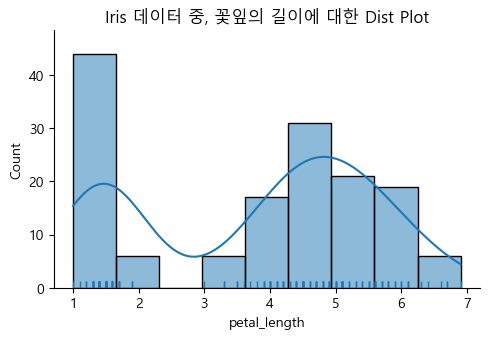

In [3]:
# distplot(distribution plot) - 일반적 방법
fig = sns.displot(x='petal_length', rug=True, kde=True, data=iris)
fig.fig.set_size_inches(5,3)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

- 카운트 플롯

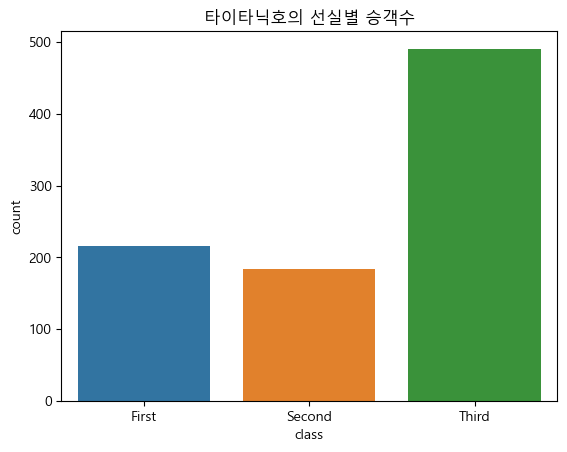

In [4]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 선실별 승객수')
plt.show()

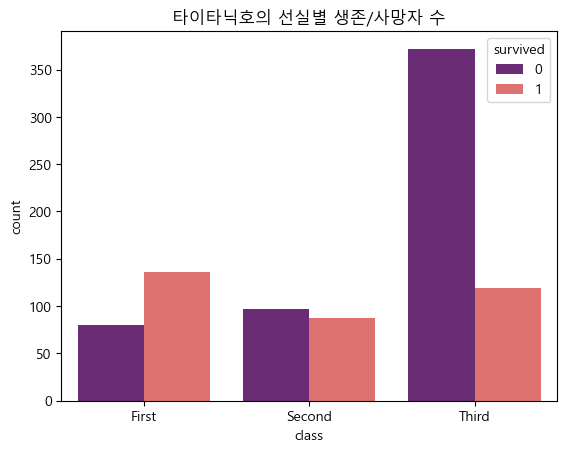

In [5]:
sns.countplot(x='class', hue='survived', data=titanic, palette='magma')
plt.title('타이타닉호의 선실별 생존/사망자 수')
plt.show()

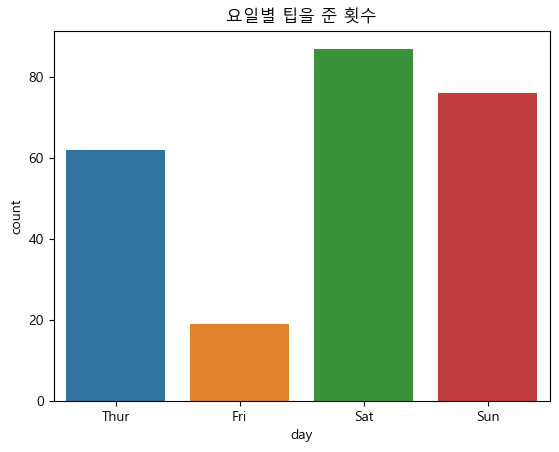

In [6]:
# 돗수를 셈. pass....
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

### 2차원 실수형 데이터

- 만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다.
- Seaborn 패키지의 jointplot 명령을 사용한다.
- jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.

- 2차원 데이터

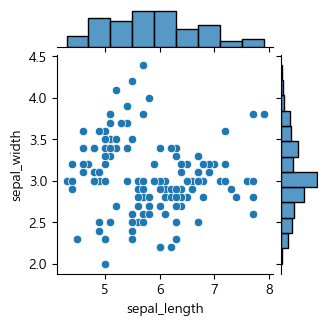

In [7]:
# joint plot
fig = sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
fig.fig.set_size_inches(3,3)
# plt.title('iris 꽃받침 길이/너비의 joint plot')
plt.show()

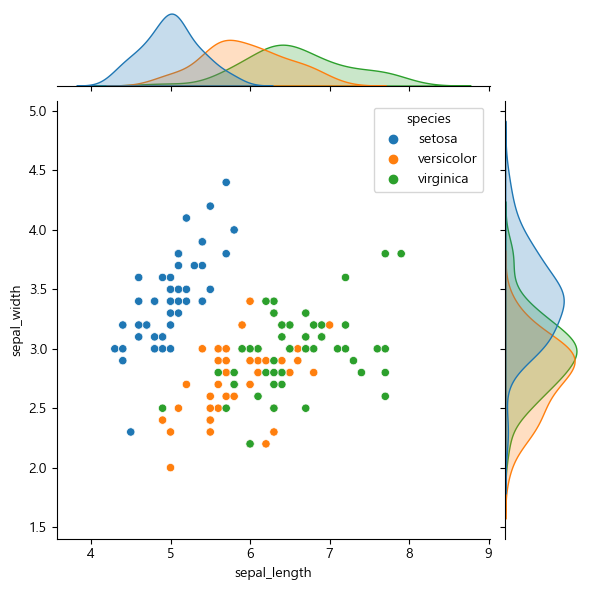

In [8]:
# joint plot
sns.jointplot(x='sepal_length', y='sepal_width', hue= 'species', data=iris)
# plt.title('iris 꽃받침 길이/너비의 joint plot')
plt.show()

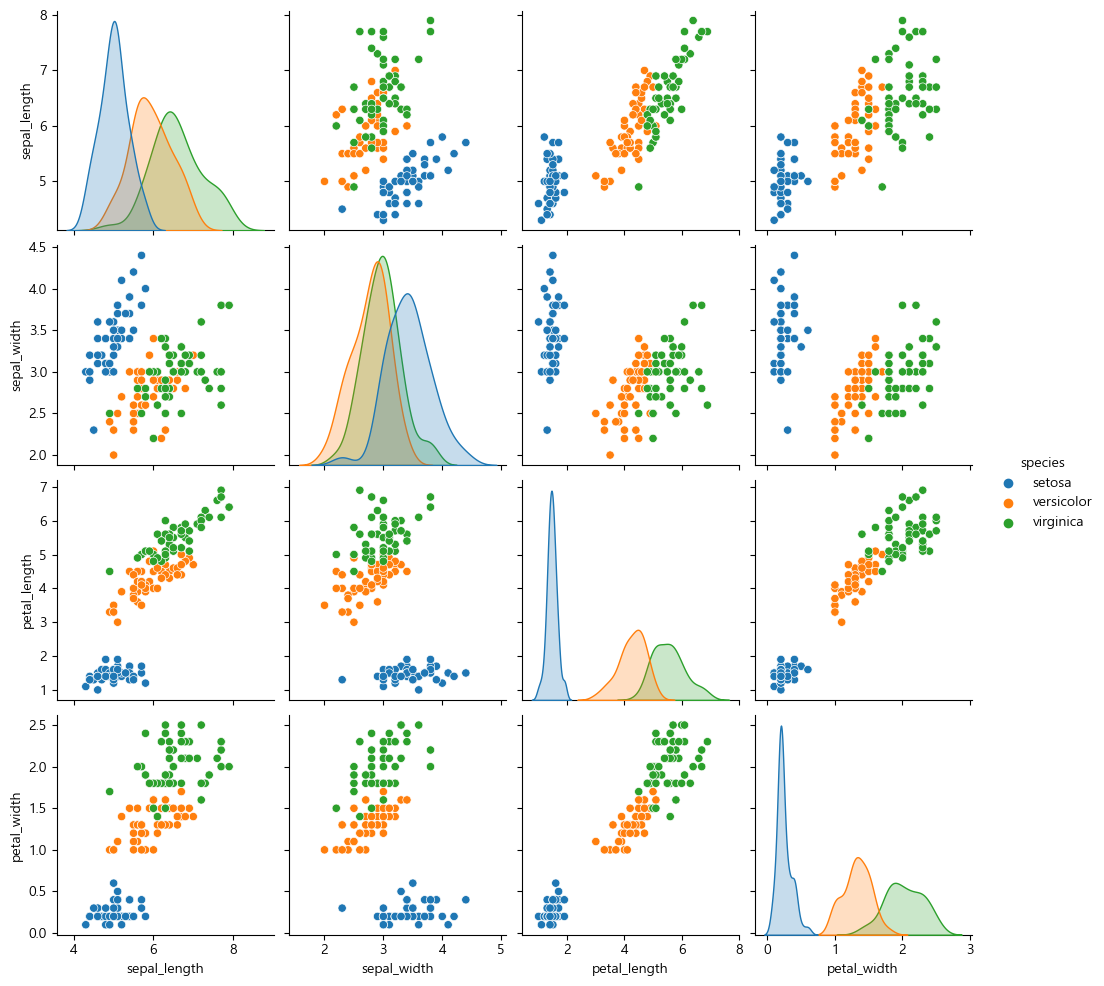

In [9]:
#pair plot
sns.pairplot(hue='species', data=iris);     # plt.show() 생략가능

- 다차원 카테고리 데이터

In [10]:
# heatmap
dt = titanic.pivot_table('survived','class','sex','count')
# dt = titanic.pivot_table(value='survived', index='class', cloumns='sex', aggfunc='count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


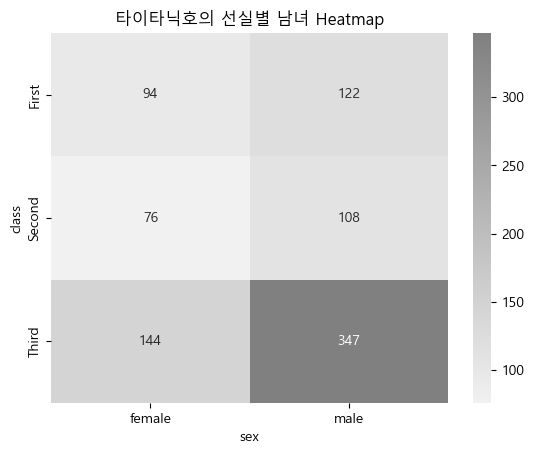

In [11]:
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True),
            annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Heatmap');

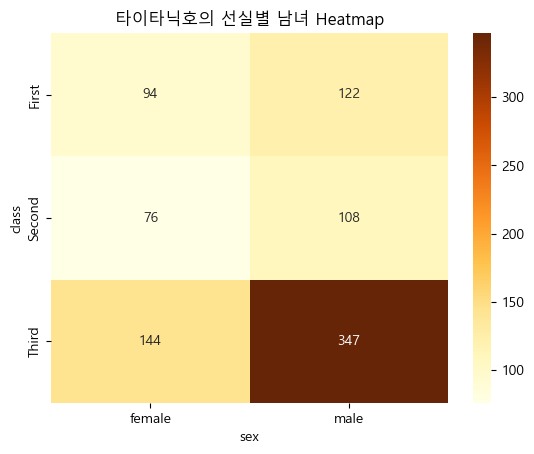

In [12]:
sns.heatmap(dt, cmap='YlOrBr', annot=True, fmt='d')   # RdPu : 레드퍼플
plt.title('타이타닉호의 선실별 남녀 Heatmap');

In [13]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [14]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


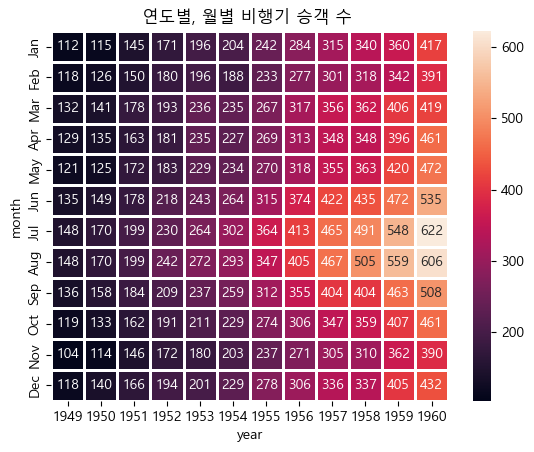

In [15]:
passengers = flights.pivot(index='month', columns='year', values='passengers')   # 행, 열
sns.heatmap(passengers, annot=True, fmt='d', linewidths=1)
plt.title('연도별, 월별 비행기 승객 수 ');

- 2차원~다차원 복합 데이터 : bar / plot

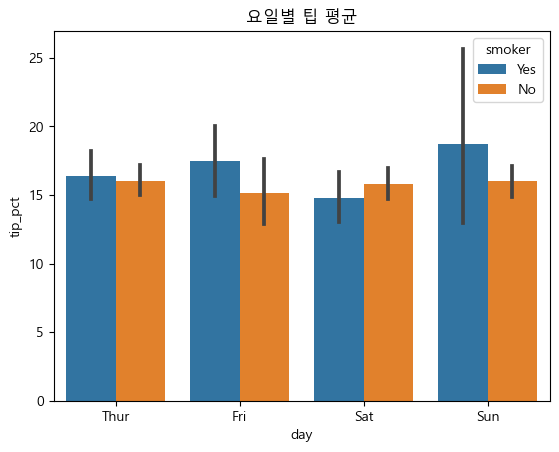

In [16]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(x='day', y='tip_pct', hue='smoker', data=tips)
plt.title('요일별 팁 평균');

In [17]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
mpg['manufacturer']=mpg.name.apply(lambda x: x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


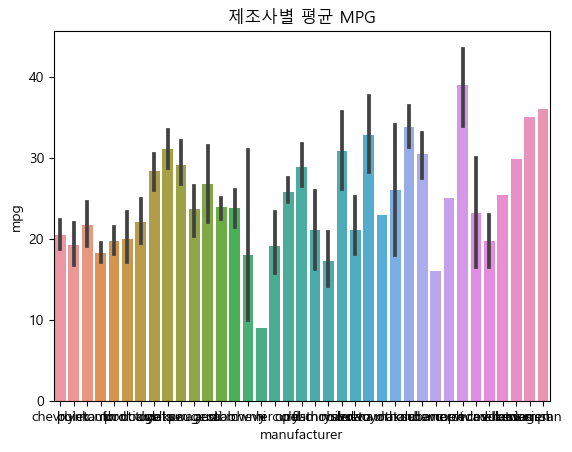

In [19]:
sns.barplot(x='manufacturer', y='mpg', data=mpg)
plt.title('제조사별 평균 MPG');

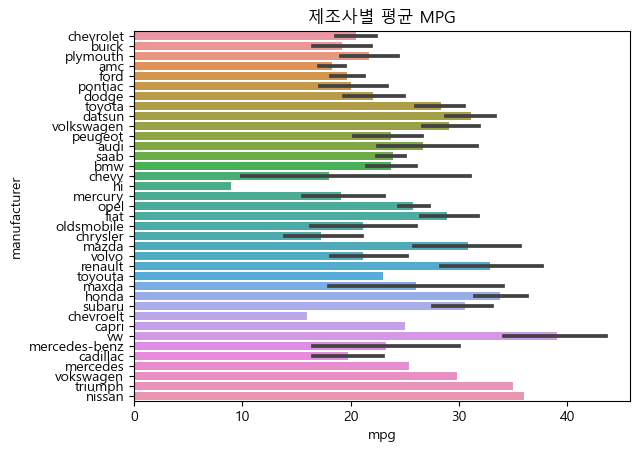

In [20]:
# x와 y 교체 -> 수평막대 그래프가 된다. 
sns.barplot(y='manufacturer', x='mpg', data=mpg)
plt.title('제조사별 평균 MPG');

- boxplot

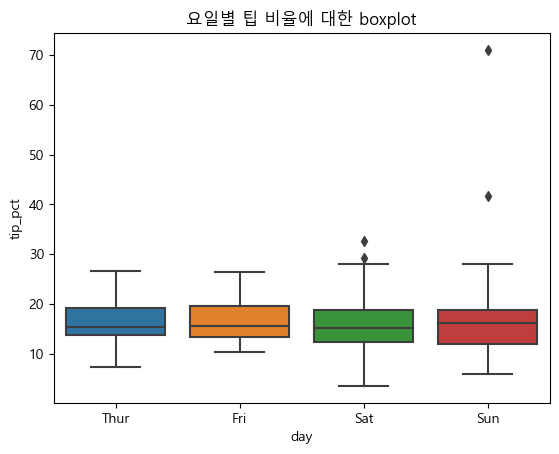

In [21]:
# 요일별 팁의 비율
sns.boxplot(x='day', y='tip_pct', data=tips)
plt.title('요일별 팁 비율에 대한 boxplot');

Text(0.5, 1.0, 'Iris 품종별 Feature')

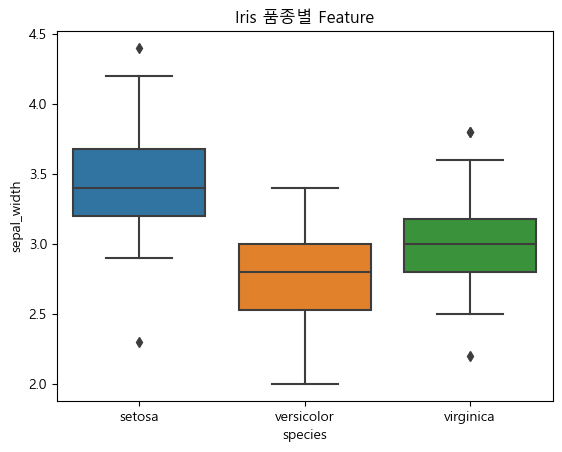

In [22]:
# iris
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris 품종별 Feature')

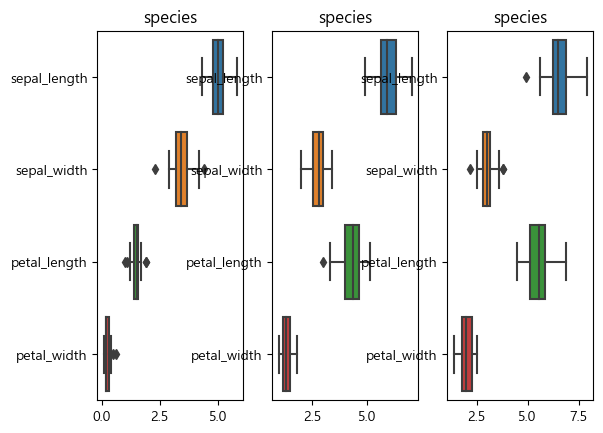

In [23]:

for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=iris[iris.species == species], orient='horizontal')
    plt.title('species')
plt.show()

- regplot

In [24]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


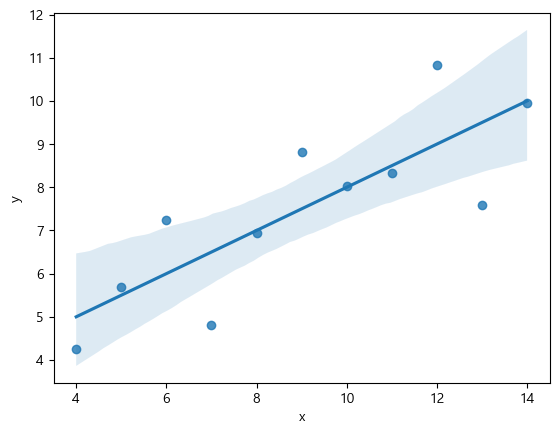

In [25]:
sns.regplot(x='x', y='y', data=ans[ans.dataset == 'I']);

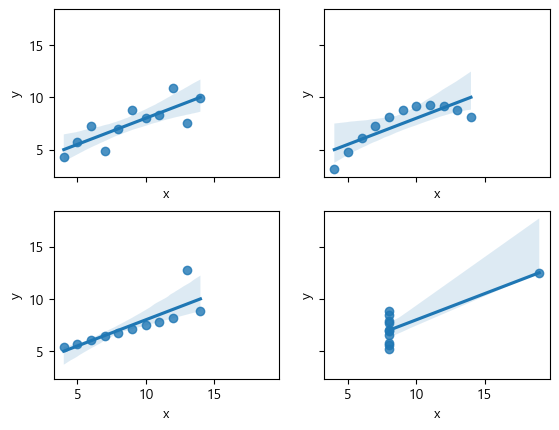

In [26]:
_, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i //2, i % 2
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=axes[row][col])
plt.show()

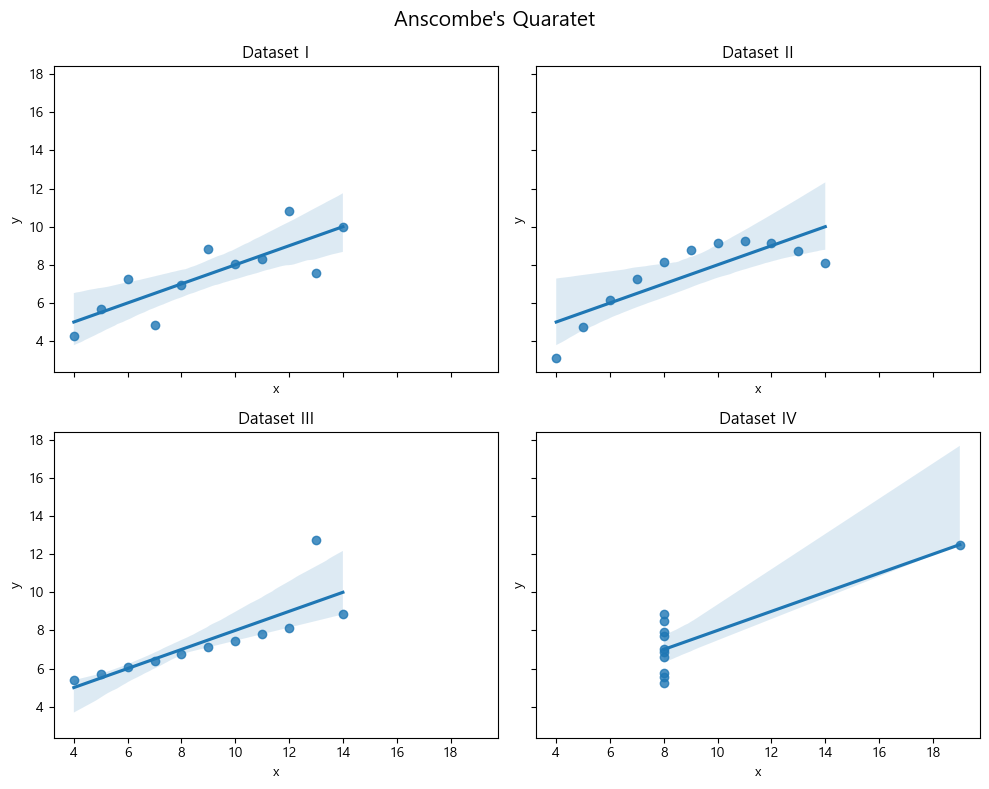

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    
    ax = axes[i //2, i % 2]         # [row, col]
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's Quaratet", fontsize=15)
plt.tight_layout()
plt.show()